In [1]:
!wget https://raw.githubusercontent.com/keerthy456/AI_Bankmarketing_/main/AIphase1.csv

--2022-05-08 01:50:24--  https://raw.githubusercontent.com/keerthy456/AI_Bankmarketing_/main/AIphase1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2733333 (2.6M) [text/plain]
Saving to: ‘AIphase1.csv’

AIphase1.csv        100%[===================>]   2.61M  --.-KB/s    in 0.06s   

2022-05-08 01:50:25 (41.2 MB/s) - ‘AIphase1.csv’ saved [2733333/2733333]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

data = pd.read_csv('AIphase1.csv',delimiter=",")

dataset = np.genfromtxt('AIphase1.csv',delimiter=',',skip_header=True)
np.set_printoptions(formatter={'float':'{:0.1f}'.format})
#np.random.shuffle(dataset)
#loading data set
#X = dataset[:,:-1]
#Y = dataset[:,-1]

NORMALIZATION

In [6]:
max_array = []
min_array =[]
size = data.shape
column= size[1]
for i in range(column):
  min = dataset[:,i].min(axis=0)
  max = dataset[:,i].max(axis=0)
  max_array.append(max)
  min_array.append(min)
  dataset[:,i] = (dataset[:,i]-min)/(max-min)
np.random.shuffle(dataset)
index = int(0.3*len(dataset[:,0]))
Y = dataset[:,-1]
YVALID = Y[:index]
high = len(YVALID) - sum(YVALID)
print("Baseline accuracy : ",high/len(YVALID))

Baseline accuracy :  0.8888439119170984


**Significance of Each feature**

In [ ]:
acc = []
index = int(0.3*len(dataset[:,0]))
for i in range(20):
  X = dataset[:,i]
  Y = dataset[:,-1]
  XVALID = X[:index]
  YVALID = Y[:index]
  XTRAIN = X[index:]
  YTRAIN = Y[index:]
  model1 = Sequential()
  model1.add(Dense(8, input_dim = 1,activation='relu'))
  model1.add(Dense(4,activation='relu'))
  model1.add(Dense(1,activation='sigmoid'))
  model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  callback_a = ModelCheckpoint(filepath = 'model1.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
  callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=40, verbose=1)
  history1 = model1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64,batch_size = 30, callbacks=[callback_a,callback_b])
  model1.load_weights('model1.hdf5')
  p1 = model1.predict(XVALID)
  accuracy = model1.evaluate(XVALID, YVALID)
  acc.append(accuracy[1])


Epoch 1/64
961/961 [==============================] - 2s 2ms/step - loss: 0.6179 - accuracy: 0.8466 - val_loss: 0.4617 - val_accuracy: 0.8842

Epoch 00001: val_accuracy improved from -inf to 0.88423, saving model to model1.hdf5
Epoch 2/64
961/961 [==============================] - 2s 2ms/step - loss: 0.4332 - accuracy: 0.8869 - val_loss: 0.3846 - val_accuracy: 0.8842

Epoch 00002: val_accuracy did not improve from 0.88423
Epoch 3/64
961/961 [==============================] - 2s 2ms/step - loss: 0.3689 - accuracy: 0.8898 - val_loss: 0.3628 - val_accuracy: 0.8842

Epoch 00003: val_accuracy did not improve from 0.88423
Epoch 4/64
961/961 [==============================] - 2s 2ms/step - loss: 0.3571 - accuracy: 0.8864 - val_loss: 0.3568 - val_accuracy: 0.8842

Epoch 00004: val_accuracy did not improve from 0.88423
Epoch 5/64
961/961 [==============================] - 2s 2ms/step - loss: 0.3528 - accuracy: 0.8861 - val_loss: 0.3537 - val_accuracy: 0.8842

Epoch 00005: val_accuracy did not i

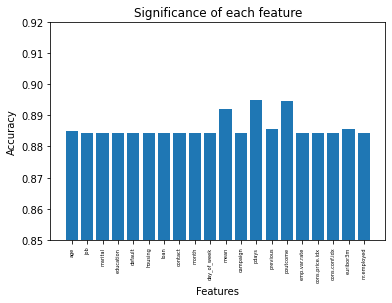

In [ ]:
column_names = data.columns
plt.bar(column_names[:20], acc)
plt.ylim(0.85,0.92)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.xticks(column_names[:20], fontsize=5, rotation=90)
plt.title('Significance of each feature')
plt.show()

**Removing One feature at a time**

In [ ]:
accuracy_r = [] 
index = int(0.3*len(dataset[:,0]))
for i in range(20):
  templist = np.delete(dataset,i,1)
  X = templist[:,:-1]
  Y = dataset[:,-1]
  XVALID = X[:index]
  YVALID = Y[:index]
  XTRAIN = X[index:]
  YTRAIN = Y[index:]
  model_r = Sequential()
  model_r.add(Dense(8, input_dim = 19, activation='relu'))
  model_r.add(Dense(4,activation='relu'))
  model_r.add(Dense(1,activation='sigmoid'))
  model_r.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  callback_a = ModelCheckpoint(filepath = 'model_r.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
  callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
  history_r = model_r.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 30, callbacks = [callback_a,callback_b])
  model_r.load_weights('model_r.hdf5')
  p_r = model_r.predict(XVALID)
  acc_r = model_r.evaluate(XVALID, YVALID)
  accuracy_r.append(acc_r[1])


Streaming output truncated to the last 5000 lines.
Epoch 36/64
961/961 [==============================] - 1s 2ms/step - loss: 0.1881 - accuracy: 0.9148 - val_loss: 0.2028 - val_accuracy: 0.9072

Epoch 00036: val_accuracy did not improve from 0.91176
Epoch 37/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1872 - accuracy: 0.9140 - val_loss: 0.1924 - val_accuracy: 0.9116

Epoch 00037: val_accuracy did not improve from 0.91176
Epoch 38/64
961/961 [==============================] - 1s 2ms/step - loss: 0.1841 - accuracy: 0.9147 - val_loss: 0.1926 - val_accuracy: 0.9110

Epoch 00038: val_accuracy did not improve from 0.91176
Epoch 39/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1932 - accuracy: 0.9124 - val_loss: 0.1926 - val_accuracy: 0.9099

Epoch 00039: val_accuracy did not improve from 0.91176
Epoch 40/64
961/961 [==============================] - 1s 2ms/step - loss: 0.1836 - accuracy: 0.9195 - val_loss: 0.1914 - val_accuracy: 0.9107

Epoch 000

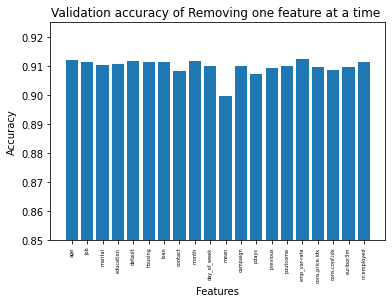

In [ ]:
column_names = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'mean', 'campaign', 'pdays','previous', 'poutcome', 'emp_var-rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']
plt.bar(column_names, accuracy_r[:20])
plt.ylim(0.85,0.925)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.xticks(column_names[:20], fontsize=5, rotation=90)
plt.title('Validation accuracy of Removing one feature at a time ')
plt.show()


**Removing Features Iteratively**

In [ ]:
accuracy_2 = [] 
t = dataset.shape
index = int(0.3*len(dataset[:,0]))
for i in range(21):
  print()
  print(i)
  print()
  X  = dataset[:,i:-1]
  Y = dataset[:,-1]
  XVALID = X[:index]
  YVALID = Y[:index]
  XTRAIN = X[index:]
  YTRAIN = Y[index:]
  model_r1 = Sequential()
  model_r1.add(Dense(8, input_dim = t[1]-i-1, activation='relu'))
  model_r1.add(Dense(4,activation='relu'))
  model_r1.add(Dense(1,activation='sigmoid'))
  model_r1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  callback_a = ModelCheckpoint(filepath = 'model_r1.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
  callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
  history_r1 = model_r1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 30, callbacks = [callback_a,callback_b])
  model_r1.load_weights('model_r1.hdf5')
  p_r1 = model_r1.predict(XVALID)
  acc_r1 = model_r1.evaluate(XVALID, YVALID)
  accuracy_2.append(acc_r1[1])


Streaming output truncated to the last 5000 lines.
961/961 [==============================] - 2s 2ms/step - loss: 0.1879 - accuracy: 0.9154 - val_loss: 0.1932 - val_accuracy: 0.9101

Epoch 00050: val_accuracy did not improve from 0.91240
Epoch 51/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1882 - accuracy: 0.9139 - val_loss: 0.1911 - val_accuracy: 0.9106

Epoch 00051: val_accuracy did not improve from 0.91240
Epoch 52/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1856 - accuracy: 0.9154 - val_loss: 0.1913 - val_accuracy: 0.9103

Epoch 00052: val_accuracy did not improve from 0.91240
Epoch 53/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1848 - accuracy: 0.9163 - val_loss: 0.1996 - val_accuracy: 0.9080

Epoch 00053: val_accuracy did not improve from 0.91240
Epoch 54/64
961/961 [==============================] - 2s 2ms/step - loss: 0.1903 - accuracy: 0.9115 - val_loss: 0.1907 - val_accuracy: 0.9103

Epoch 00054: val_accu

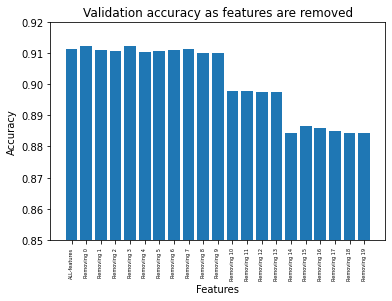

In [ ]:
column_names = ['ALL-features','Removing 0', 'Removing 1', 'Removing 2', 'Removing 3', 'Removing 4', 'Removing 5', 'Removing 6','Removing 7', 'Removing 8', 'Removing 9', 'Removing 10', 'Removing 11', 'Removing 12', 'Removing 13', 'Removing 14', 'Removing 15', 'Removing 16','Removing 17', 'Removing 18', 'Removing 19']
plt.bar(column_names[:21], accuracy_2)
plt.ylim(0.85,0.92)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.xticks(column_names[:21], fontsize=5, rotation=90)
plt.title('Validation accuracy as features are removed')
plt.show()

**Removing Least-2 significant Features**

In [ ]:
t = np.delete(dataset,1,1)
t = np.delete(t,1,1)
index = int(0.3*len(dataset[:,0]))
X  = t[:,:-1]
Y = dataset[:,-1]
XVALID = X[:index]
YVALID = Y[:index]
XTRAIN = X[index:]
YTRAIN = Y[index:]
model_r2 = Sequential()
model_r2.add(Dense(8, input_dim = 18, activation='relu'))
model_r2.add(Dense(4,activation='relu'))
model_r2.add(Dense(1,activation='sigmoid'))
model_r2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'model_r2.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
history_r2 = model_r2.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 40, callbacks = [callback_a,callback_b])
model_r2.load_weights('model_r2.hdf5')
p_r2 = model_r2.predict(XVALID)
acc_r2 = model_r2.evaluate(XVALID, YVALID)
accuracy_3.append(acc_r2[1])


Epoch 1/64
721/721 [==============================] - 2s 2ms/step - loss: 0.4116 - accuracy: 0.8594 - val_loss: 0.2835 - val_accuracy: 0.8973

Epoch 00001: val_accuracy improved from -inf to 0.89726, saving model to model_r2.hdf5
Epoch 2/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.9007 - val_loss: 0.2590 - val_accuracy: 0.9014

Epoch 00002: val_accuracy improved from 0.89726 to 0.90139, saving model to model_r2.hdf5
Epoch 3/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2442 - accuracy: 0.9052 - val_loss: 0.2344 - val_accuracy: 0.9058

Epoch 00003: val_accuracy improved from 0.90139 to 0.90585, saving model to model_r2.hdf5
Epoch 4/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2242 - accuracy: 0.9089 - val_loss: 0.2217 - val_accuracy: 0.9072

Epoch 00004: val_accuracy improved from 0.90585 to 0.90722, saving model to model_r2.hdf5
Epoch 5/64
721/721 [==============================] - 1s 2ms/step - los

**Removing Least-3 significant Features**

In [ ]:
t = np.delete(dataset,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
index = int(0.3*len(dataset[:,0]))
X  = t[:,:-1]
Y = dataset[:,-1]
XVALID = X[:index]
YVALID = Y[:index]
XTRAIN = X[index:]
YTRAIN = Y[index:]
model_r3 = Sequential()
model_r3.add(Dense(8, input_dim = 17, activation='relu'))
model_r3.add(Dense(4,activation='relu'))
model_r3.add(Dense(1,activation='sigmoid'))
model_r3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'model_r3.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
history_r3 = model_r3.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 40, callbacks = [callback_a,callback_b])
model_r3.load_weights('model_r3.hdf5')
p_r3 = model_r3.predict(XVALID)
acc_r3 = model_r3.evaluate(XVALID, YVALID)



Epoch 1/64
721/721 [==============================] - 2s 2ms/step - loss: 0.3816 - accuracy: 0.8893 - val_loss: 0.2892 - val_accuracy: 0.8850

Epoch 00001: val_accuracy improved from -inf to 0.88496, saving model to model_r3.hdf5
Epoch 2/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2822 - accuracy: 0.8909 - val_loss: 0.2611 - val_accuracy: 0.9005

Epoch 00002: val_accuracy improved from 0.88496 to 0.90050, saving model to model_r3.hdf5
Epoch 3/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2473 - accuracy: 0.9021 - val_loss: 0.2321 - val_accuracy: 0.9057

Epoch 00003: val_accuracy improved from 0.90050 to 0.90568, saving model to model_r3.hdf5
Epoch 4/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2238 - accuracy: 0.9079 - val_loss: 0.2219 - val_accuracy: 0.9069

Epoch 00004: val_accuracy improved from 0.90568 to 0.90690, saving model to model_r3.hdf5
Epoch 5/64
721/721 [==============================] - 1s 2ms/step - los

**Removing Least-4 significant Features**

In [ ]:
t = np.delete(dataset,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
index = int(0.3*len(dataset[:,0]))
X  = t[:,:-1]
Y = dataset[:,-1]
XVALID = X[:index]
YVALID = Y[:index]
XTRAIN = X[index:]
YTRAIN = Y[index:]
model_r4 = Sequential()
model_r4.add(Dense(8, input_dim = 16, activation='relu'))
model_r4.add(Dense(4,activation='relu'))
model_r4.add(Dense(1,activation='sigmoid'))
model_r4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'model_r4.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
history_r4 = model_r4.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 40, callbacks = [callback_a,callback_b])
model_r4.load_weights('model_r4.hdf5')
p_r4 = model_r4.predict(XVALID)
acc_r4 = model_r4.evaluate(XVALID, YVALID)



Epoch 1/64
721/721 [==============================] - 2s 2ms/step - loss: 0.4426 - accuracy: 0.8474 - val_loss: 0.2893 - val_accuracy: 0.8842

Epoch 00001: val_accuracy improved from -inf to 0.88423, saving model to model_r4.hdf5
Epoch 2/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2787 - accuracy: 0.8877 - val_loss: 0.2603 - val_accuracy: 0.8842

Epoch 00002: val_accuracy did not improve from 0.88423
Epoch 3/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2466 - accuracy: 0.8906 - val_loss: 0.2358 - val_accuracy: 0.9051

Epoch 00003: val_accuracy improved from 0.88423 to 0.90512, saving model to model_r4.hdf5
Epoch 4/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2260 - accuracy: 0.9071 - val_loss: 0.2212 - val_accuracy: 0.9080

Epoch 00004: val_accuracy improved from 0.90512 to 0.90795, saving model to model_r4.hdf5
Epoch 5/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2117 - accuracy: 0.9130 - val_

**Removing Least-5 significant Features**

In [ ]:
t = np.delete(dataset,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
t = np.delete(t,1,1)
index = int(0.3*len(dataset[:,0]))
X  = t[:,:-1]
Y = dataset[:,-1]
XVALID = X[:index]
YVALID = Y[:index]
XTRAIN = X[index:]
YTRAIN = Y[index:]
model_r5 = Sequential()
model_r5.add(Dense(8, input_dim = 15, activation='relu'))
model_r5.add(Dense(4,activation='relu'))
model_r5.add(Dense(1,activation='sigmoid'))
model_r5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callback_a = ModelCheckpoint(filepath = 'model_r5.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  # The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=64, verbose=1)
history_r5 = model_r5.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=64, batch_size = 40, callbacks = [callback_a,callback_b])
model_r5.load_weights('model_r5.hdf5')
p_r5 = model_r5.predict(XVALID)
acc_r5 = model_r5.evaluate(XVALID, YVALID)



Epoch 1/64
721/721 [==============================] - 2s 2ms/step - loss: 0.5280 - accuracy: 0.7619 - val_loss: 0.2885 - val_accuracy: 0.8862

Epoch 00001: val_accuracy improved from -inf to 0.88617, saving model to model_r5.hdf5
Epoch 2/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2727 - accuracy: 0.8979 - val_loss: 0.2575 - val_accuracy: 0.9007

Epoch 00002: val_accuracy improved from 0.88617 to 0.90074, saving model to model_r5.hdf5
Epoch 3/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2458 - accuracy: 0.9047 - val_loss: 0.2360 - val_accuracy: 0.9048

Epoch 00003: val_accuracy improved from 0.90074 to 0.90479, saving model to model_r5.hdf5
Epoch 4/64
721/721 [==============================] - 1s 2ms/step - loss: 0.2298 - accuracy: 0.9083 - val_loss: 0.2258 - val_accuracy: 0.9067

Epoch 00004: val_accuracy improved from 0.90479 to 0.90665, saving model to model_r5.hdf5
Epoch 5/64
721/721 [==============================] - 1s 2ms/step - los

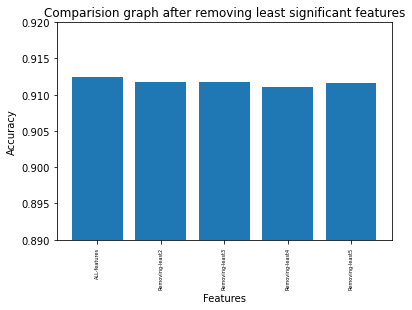

In [ ]:
column_names = ['ALL-features','Removing-least2','Removing-least3','Removing-least4','Removing-least5']
accuracies = []
accuracies.append(accuracy_2[1])
accuracies.append(acc_r2[1])
accuracies.append(acc_r3[1])
accuracies.append(acc_r4[1])
accuracies.append(acc_r5[1])
plt.bar(column_names, accuracies)
plt.ylim(0.89,0.92)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.xticks(column_names, fontsize=5, rotation=90)
plt.title('Comparision graph after removing least significant features')
plt.show()